In [38]:
!pip install kagglehub
!pip install imblearn

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [40]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "rabieelkharoua/asthma-disease-dataset",
    "asthma_disease_data.csv",
)

df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

#### Splitting training and testing set at the very start to avoid data leakage

In [42]:
X = df.drop("Diagnosis", axis=1)  # features
y = df["Diagnosis"]               # target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:
df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,DoctorInCharge,Diagnosis
2024,7058,17,1,0,0,17.628768,0,6.311238,4.641921,9.703032,...,3.259456,2.417214,1,0,0,1,1,1,Dr_Confid,0
212,5246,41,1,0,2,30.344109,0,0.259373,1.061256,9.828253,...,1.518754,2.590380,0,0,0,1,1,1,Dr_Confid,0


In [44]:
df_train.shape

(1913, 29)

In [45]:
df_test.shape

(479, 29)

#### Checking if there are any null values

In [46]:
df_train.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
DoctorInCharge            0
Diagnosis                 0
dtype: int64

In [47]:
df_test.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
DoctorInCharge            0
Diagnosis                 0
dtype: int64

#### Checking if there are any duplicates

In [48]:
df_train[df_train.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,DoctorInCharge,Diagnosis


In [49]:
df_test[df_test.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,DoctorInCharge,Diagnosis


#### Printing out all the unique values for each column

In [50]:
uniques_train = {col:df_train[col].unique() for col in df_train.columns}
uniques_train

{'PatientID': array([7058, 5246, 5116, ..., 6930, 6566, 6266], shape=(1913,)),
 'Age': array([17, 41, 35, 36, 48, 14,  7,  5, 63, 38, 70, 59, 71, 25, 54, 62, 69,
        16, 64, 26, 24, 76, 49, 45, 47, 27,  9, 78, 51, 20, 53, 72, 32, 67,
        18, 33, 23, 19, 79, 73, 39, 57, 40, 68,  8, 61, 30, 34, 74, 21, 56,
        46, 42, 37, 44, 22, 66, 15, 11, 77, 13, 12, 43, 29, 10, 28, 31, 58,
        75, 55, 50, 65, 52,  6, 60]),
 'Gender': array([1, 0]),
 'Ethnicity': array([0, 2, 3, 1]),
 'EducationLevel': array([0, 2, 3, 1]),
 'BMI': array([17.62876787, 30.3441089 , 36.2753016 , ..., 19.22550336,
        20.64233741, 18.93823134], shape=(1913,)),
 'Smoking': array([0, 1]),
 'PhysicalActivity': array([6.31123801, 0.25937337, 5.6452398 , ..., 3.12346695, 7.08051618,
        2.27346178], shape=(1913,)),
 'DietQuality': array([4.64192145, 1.06125629, 9.81068683, ..., 4.47353202, 3.72607075,
        5.88318427], shape=(1913,)),
 'SleepQuality': array([9.70303202, 9.82825336, 5.8560589 , ..., 4

In [51]:
df_train.drop(['DoctorInCharge'],axis=1,inplace=True)
df_test.drop(['DoctorInCharge'],axis=1,inplace=True)

In [52]:
uniques_test = {col:df_test[col].unique() for col in df_test.columns}
uniques_test

{'PatientID': array([7102, 5522, 5313, 7083, 6964, 6187, 7015, 6432, 6844, 6568, 7208,
        6246, 6492, 6940, 7087, 5071, 7242, 7096, 5760, 5127, 6050, 6399,
        6149, 6272, 6103, 5835, 6672, 5224, 6218, 6229, 5234, 6294, 5910,
        6830, 6334, 5736, 7180, 7042, 7053, 7223, 5526, 5673, 6062, 5220,
        5825, 5434, 6661, 6549, 5936, 7293, 7391, 7322, 5803, 6677, 7077,
        6342, 6143, 6188, 7342, 7329, 6623, 6401, 6957, 5721, 6406, 7136,
        6331, 6449, 6929, 6697, 5510, 5327, 6184, 7090, 5084, 5338, 5680,
        7366, 6604, 6730, 5809, 6989, 5214, 5425, 5580, 6029, 5897, 7157,
        6875, 6529, 5646, 6530, 6442, 5413, 5661, 6277, 6821, 6126, 5995,
        5263, 5051, 5675, 6473, 5489, 6175, 6006, 7030, 6738, 6670, 6045,
        6918, 5912, 6054, 5608, 5988, 6247, 7183, 5869, 5302, 6807, 6791,
        6828, 5364, 6046, 5993, 7144, 6561, 7209, 6055, 6407, 6388, 7261,
        5060, 5486, 6164, 5080, 5477, 6853, 6479, 5718, 7335, 5693, 6716,
        6768, 7377, 6161,

In [53]:
df_train_non_binary_cols = [col for col in df_train.columns if set(df_train[col].unique()) != {0,1}]
df_train[df_train_non_binary_cols].describe()


,PatientID,Age,Ethnicity,EducationLevel,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,6220.263983,42.423941,0.671720,1.310507,27.302278,5.034071,5.006618,6.984336,5.045857,5.125600,4.951884,2.554852,3.736044
std,693.755394,21.510423,0.988913,0.883827,7.238823,2.906831,2.916353,1.734102,2.926003,2.906706,2.842080,0.857662,1.297450
min,5034.000000,5.000000,0.000000,0.000000,15.031803,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,1.000459,1.505442
25%,5610.000000,24.000000,0.000000,1.000000,20.936782,2.511388,2.351225,5.459637,2.457550,2.599160,2.502042,1.835737,2.629228
50%,6230.000000,43.000000,0.000000,1.000000,27.127832,5.031913,5.077940,6.931329,5.074523,5.136633,4.853199,2.555308,3.716878
75%,6820.000000,61.000000,1.000000,2.000000,33.709284,7.530660,7.531157,8.506949,7.629720,7.708811,7.375382,3.293096,4.848140
max,7424.000000,79.000000,3.000000,3.000000,39.985611,9.995809,9.999904,9.996235,9.998964,9.999555,9.986299,3.999719,5.998677


In [54]:
df_train_binary_cols = [col for col in df_train.columns if set(df_train[col].unique()) == {0,1}]
df_train[df_train_binary_cols].describe()

,Gender,Smoking,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.00000,1913.000000
mean,0.488238,0.142185,0.169367,0.297439,0.405646,0.189232,0.251438,0.160481,0.593309,0.497648,0.505489,0.507580,0.598014,0.60115,0.051751
std,0.499992,0.349331,0.375174,0.457251,0.491145,0.391795,0.433953,0.367147,0.491345,0.500125,0.500101,0.500073,0.490427,0.48979,0.221582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [55]:
df_test_non_binary_cols = [col for col in df_test.columns if set(df_test[col].unique()) != {0,1}]
df_test[df_test_non_binary_cols].describe()

,PatientID,Age,Ethnicity,EducationLevel,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,6266.386221,40.995825,0.661795,1.294363,27.015632,5.122535,5.087760,7.157496,4.881925,5.068775,5.101597,2.523454,3.762141
std,677.591491,21.972405,0.975871,0.954504,7.053910,2.892478,2.886503,1.720798,2.973111,2.840590,2.926494,0.878635,1.329484
min,5035.000000,5.000000,0.000000,0.000000,15.045955,0.023066,0.008943,4.009720,0.026951,0.010770,0.013836,1.000793,1.500045
25%,5706.000000,22.000000,0.000000,1.000000,21.282458,2.699291,2.698750,5.678832,2.244569,2.606044,2.353131,1.756631,2.561961
50%,6229.000000,40.000000,0.000000,1.000000,26.313725,4.984107,5.218310,7.283939,4.834422,4.876549,5.080510,2.548563,3.833676
75%,6846.500000,61.000000,1.000000,2.000000,33.014043,7.568017,7.574410,8.671355,7.638260,7.710305,7.654519,3.291769,4.917258
max,7425.000000,79.000000,3.000000,3.000000,39.900003,9.954117,9.953078,9.991200,9.984785,9.970802,9.999708,3.999608,5.999421


In [56]:
df_test_binary_cols = [col for col in df_test.columns if set(df_test[col].unique()) == {0,1}]
df_train[df_test_binary_cols].describe()

,Gender,Smoking,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.00000,1913.000000
mean,0.488238,0.142185,0.169367,0.297439,0.405646,0.189232,0.251438,0.160481,0.593309,0.497648,0.505489,0.507580,0.598014,0.60115,0.051751
std,0.499992,0.349331,0.375174,0.457251,0.491145,0.391795,0.433953,0.367147,0.491345,0.500125,0.500101,0.500073,0.490427,0.48979,0.221582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Univariate Analysis

#### Binary Columns

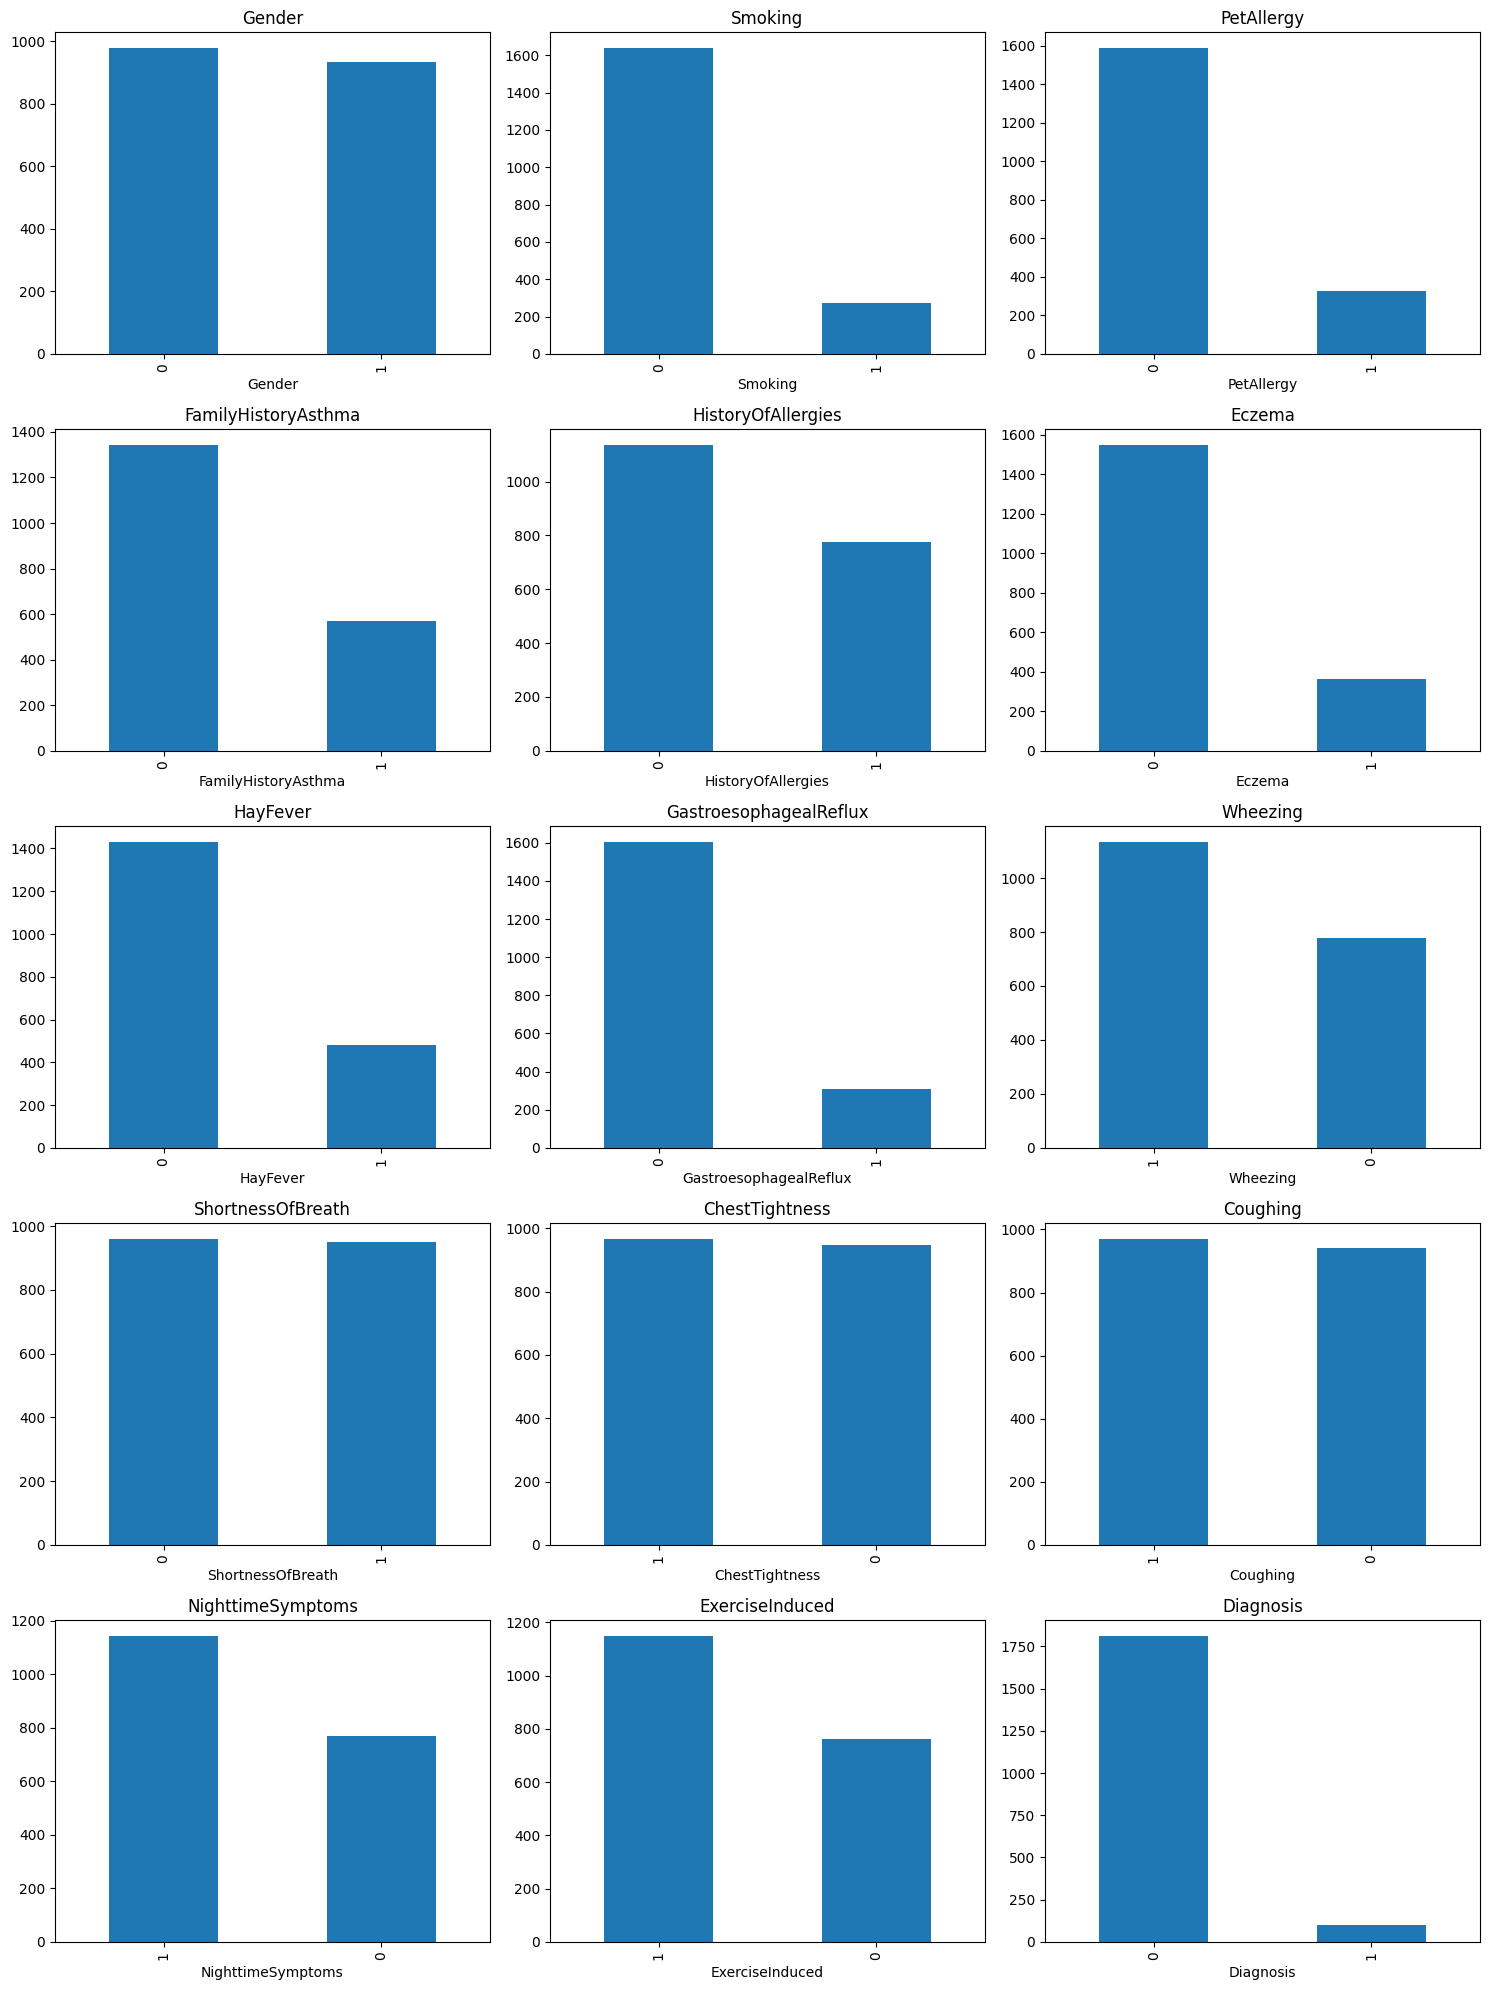

In [57]:
cols = df_train_binary_cols
n_cols = 3  # number of plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # total number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

for i, col in enumerate(cols):
    ax = axes[i // n_cols, i % n_cols]
    df_train[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)

# Remove empty subplots if any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

#### Non Binary Columns

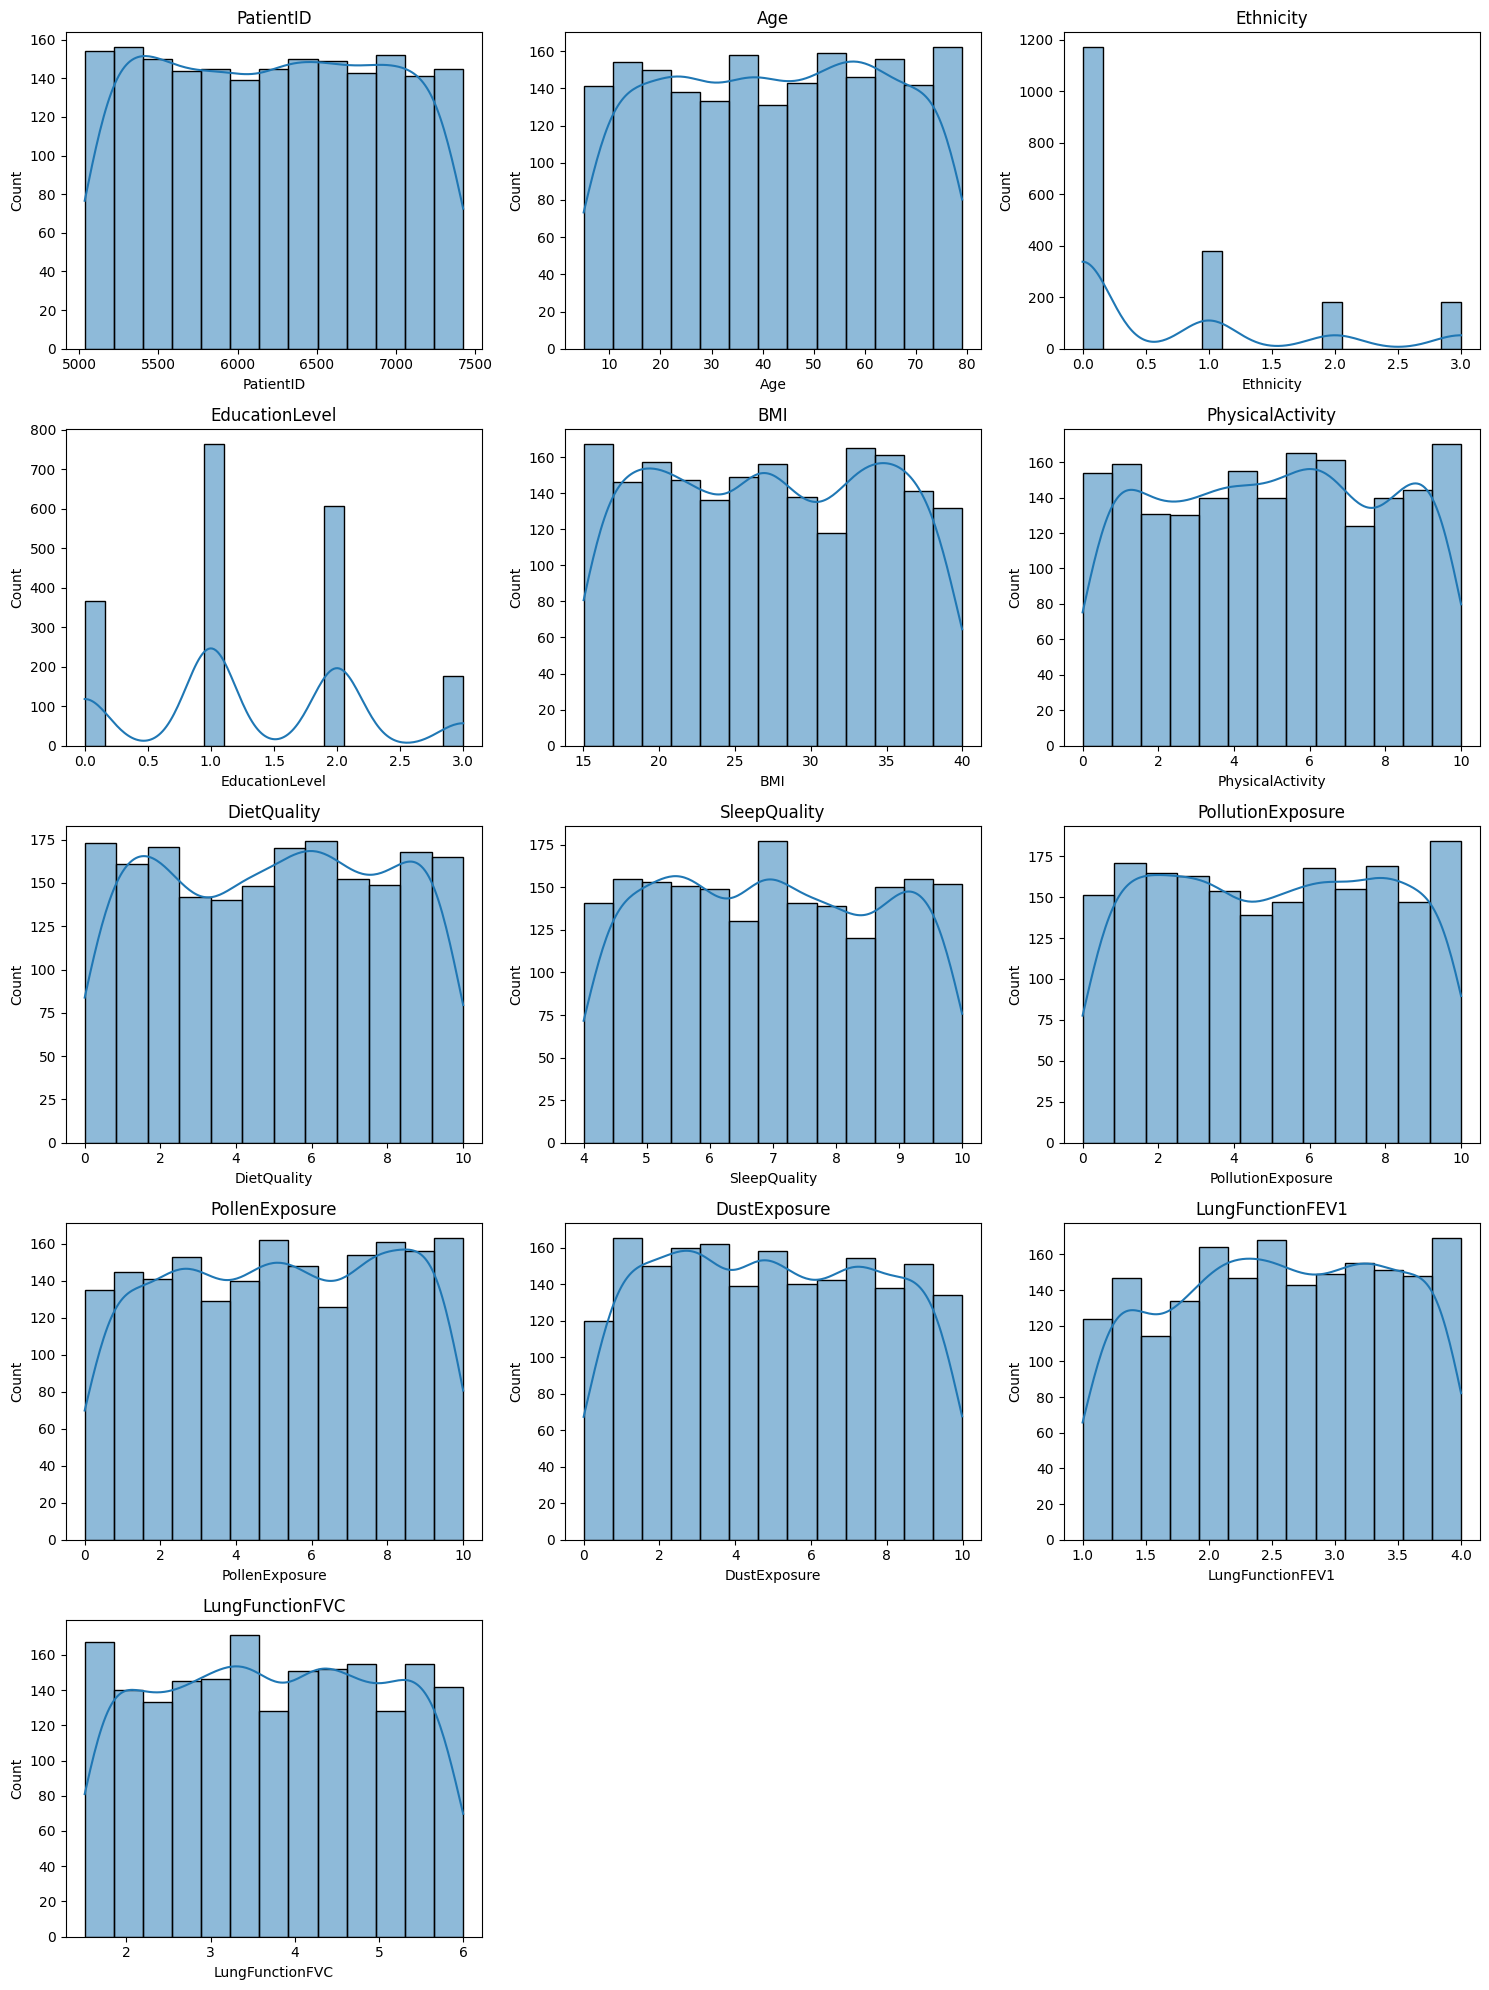

In [58]:

n_cols = 3 
n_plots = len(df_train_non_binary_cols)
n_rows = math.ceil(n_plots / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*5, n_rows*4))
axs = axs.flatten()

for i, column in enumerate(df_train_non_binary_cols):
    sns.histplot(df_train[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

# Turn off unused subplots
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

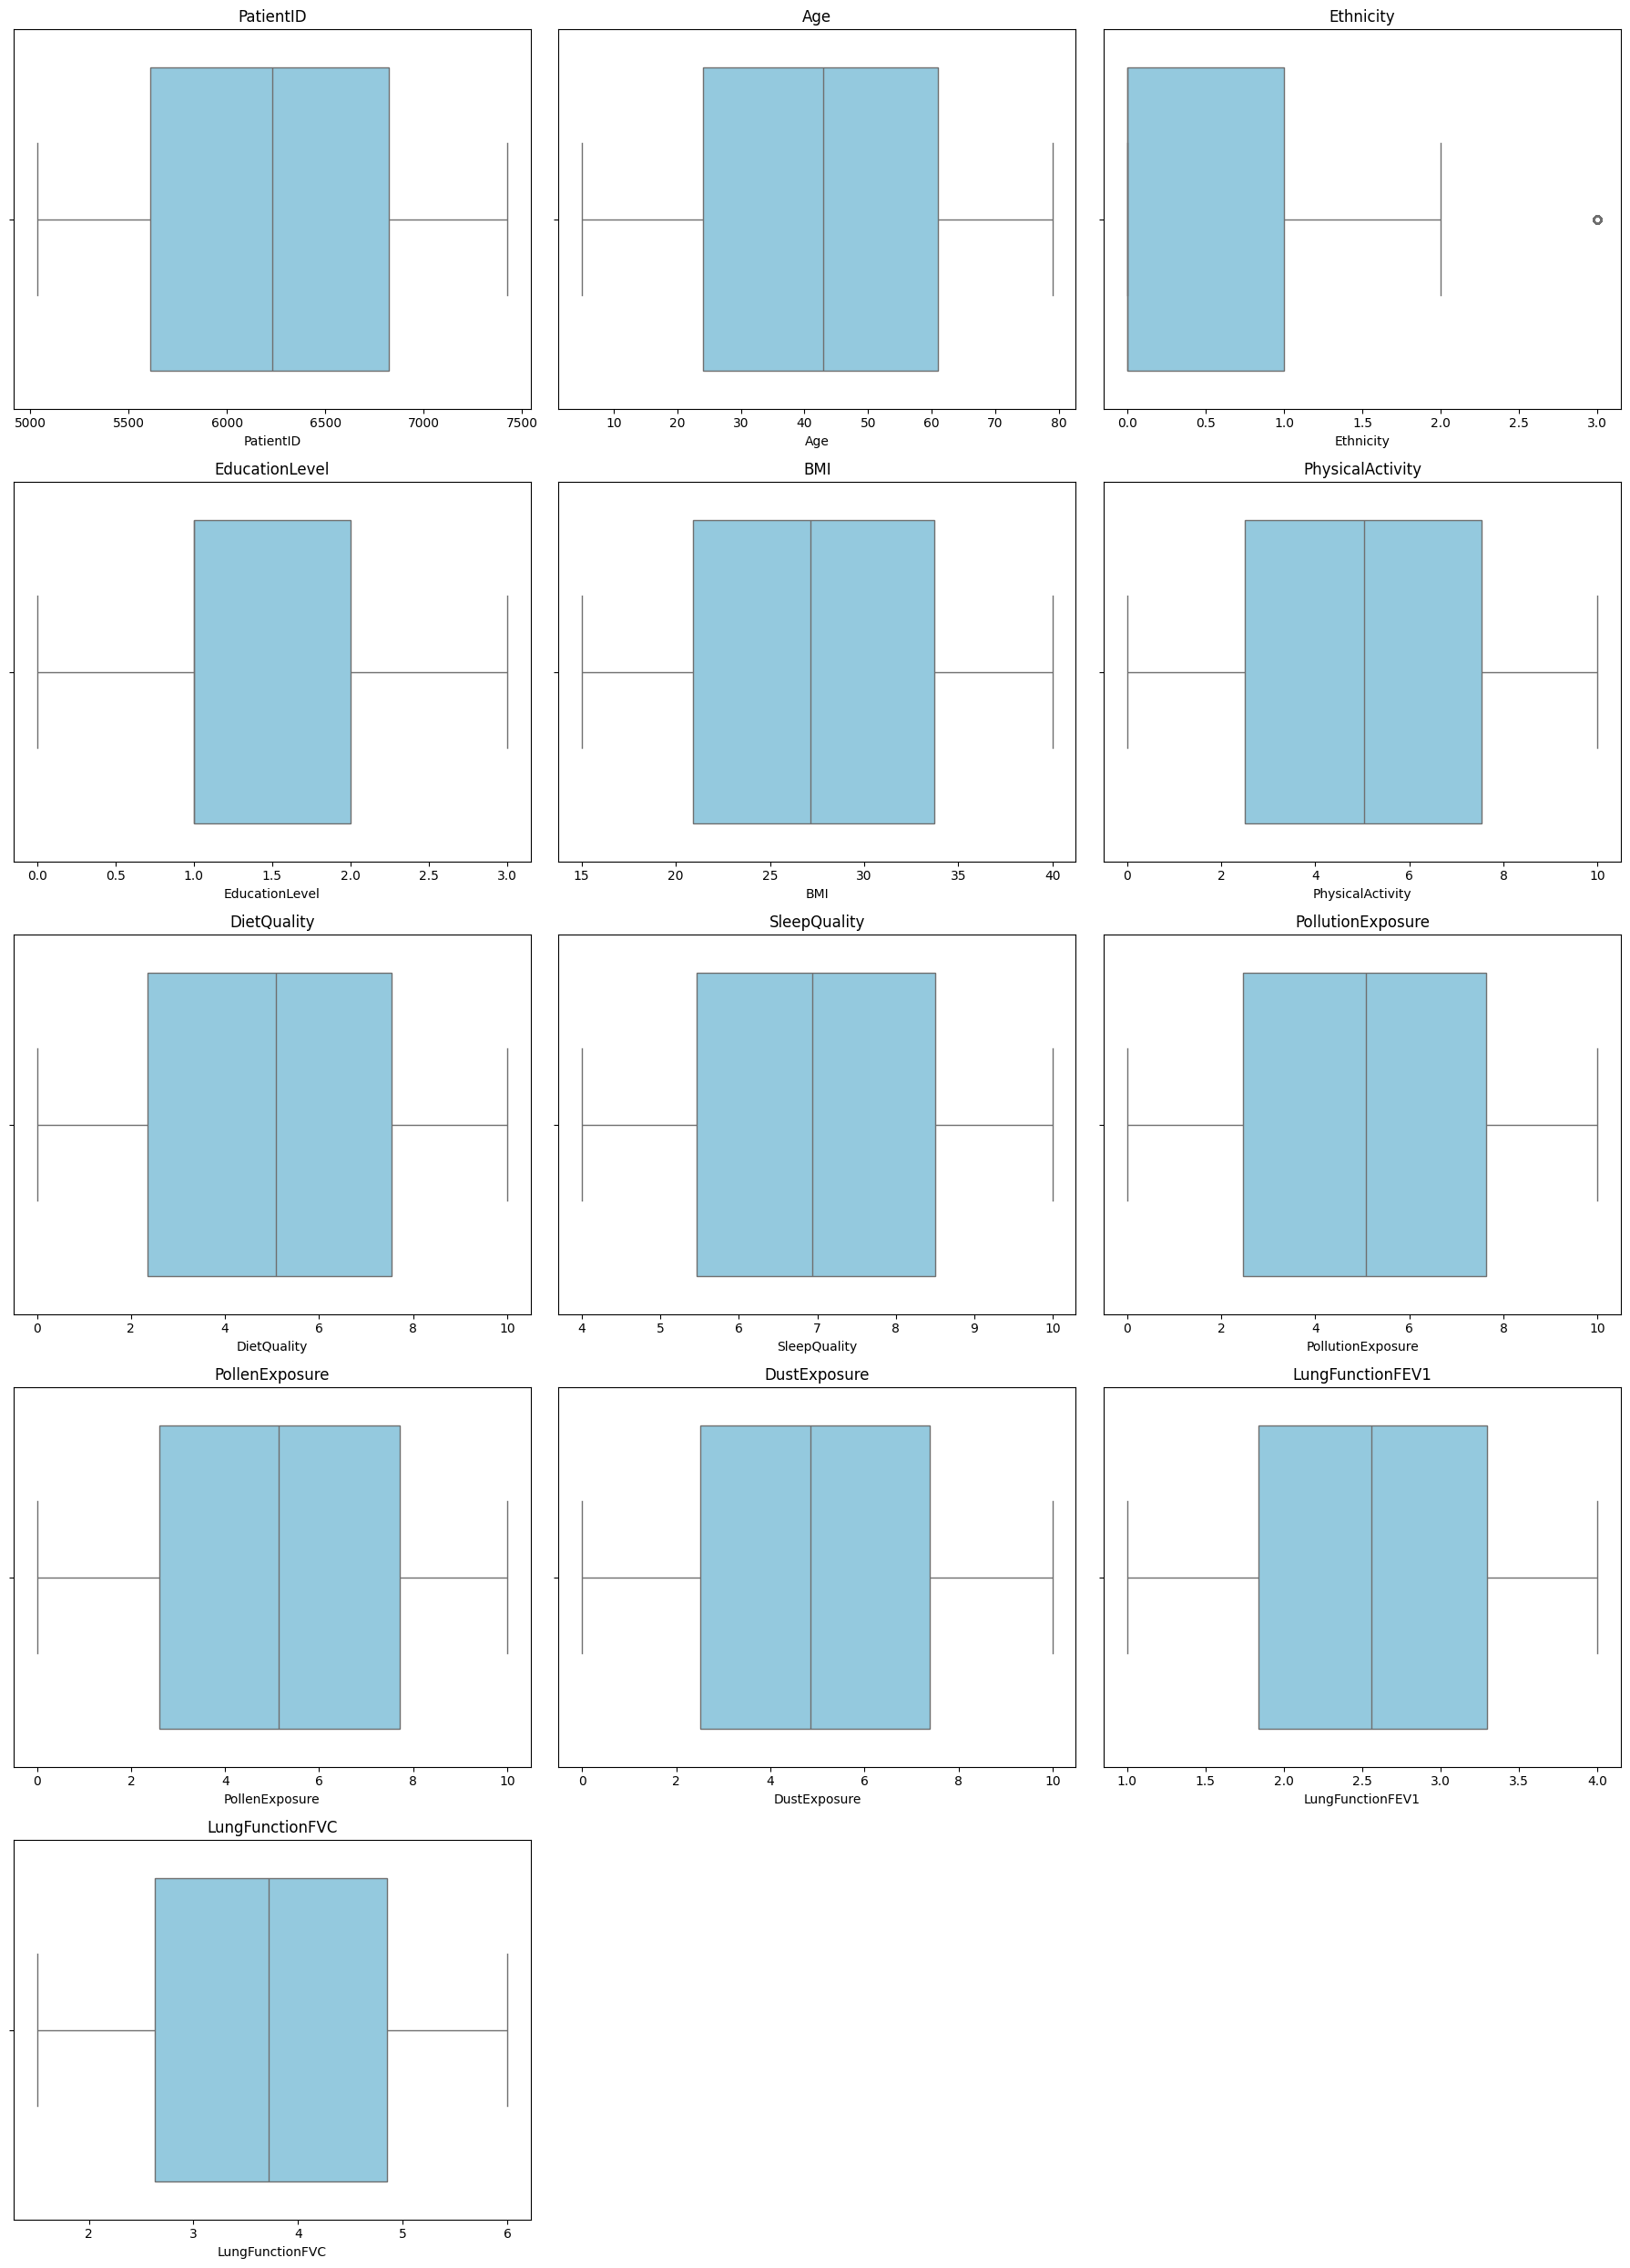

In [59]:
n_cols = 3
n_plots = len(df_train_non_binary_cols)
n_rows = math.ceil(n_plots / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*6, n_rows*5))
axs = axs.flatten()

for i, column in enumerate(df_train_non_binary_cols):
    sns.boxplot(x=df_train[column], ax=axs[i], color="skyblue", orient="h")
    axs[i].set_title(column)

# Turn off unused axes
for j in range(i+1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

#### Bivariate Analysis

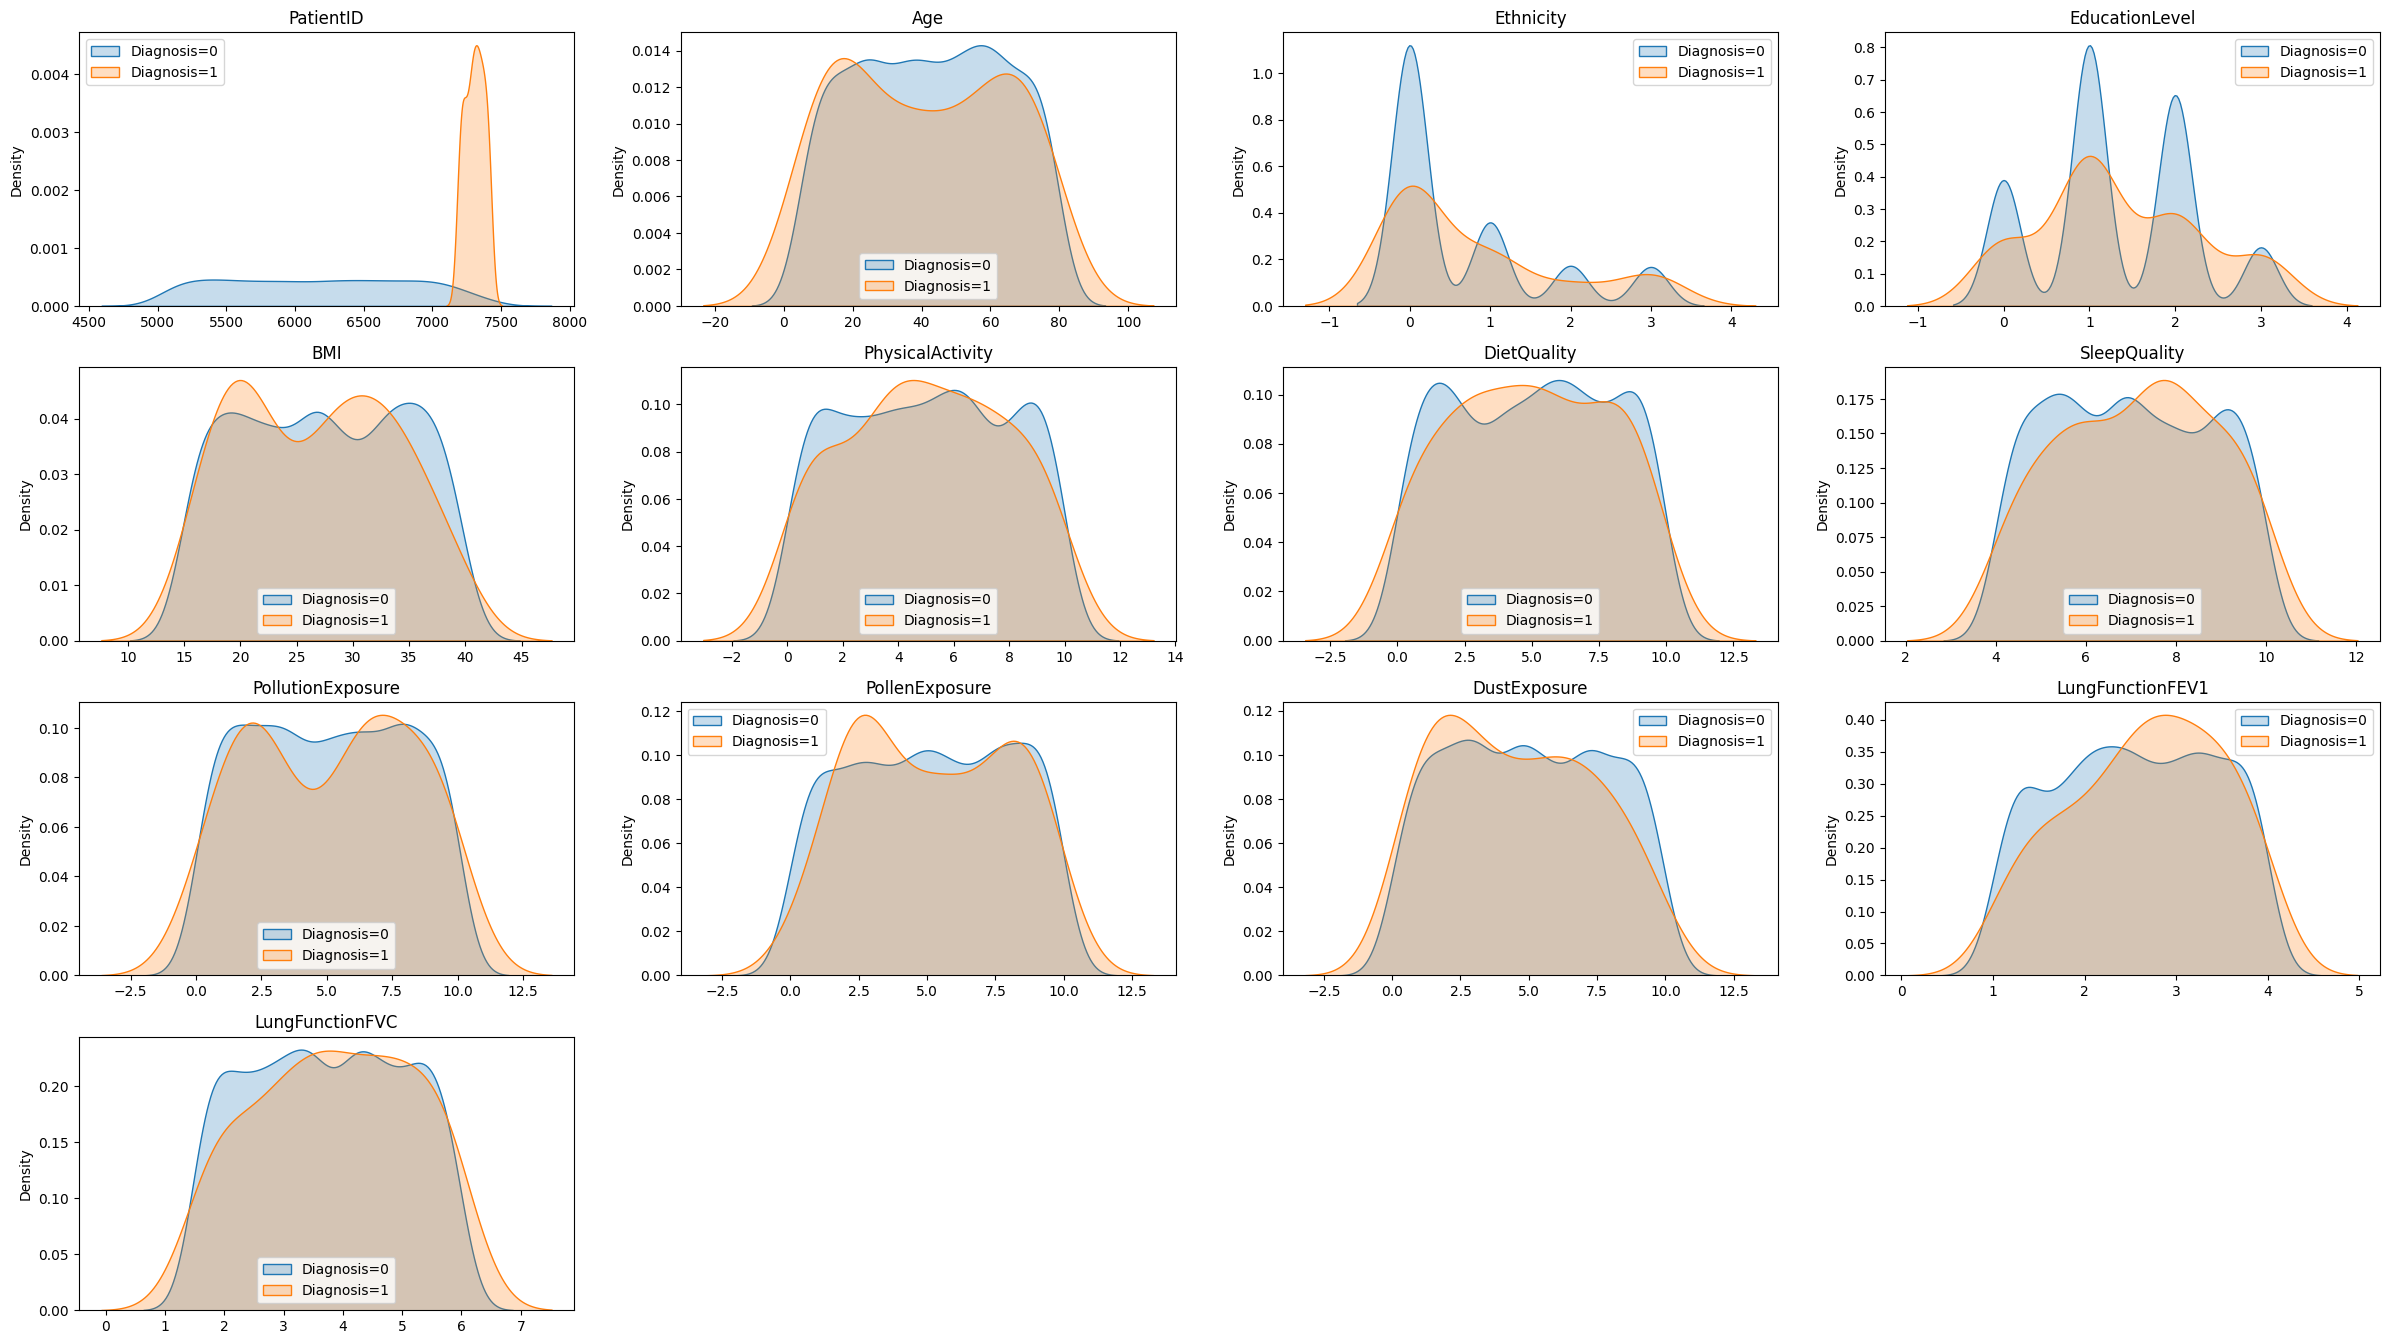

In [60]:
plt.figure(figsize=(24, 20))

for i, col in enumerate(df_train_non_binary_cols):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(df_train[col][df_train['Diagnosis']==0], fill=True, label='Diagnosis=0')
    sns.kdeplot(df_train[col][df_train['Diagnosis']==1], fill=True, label='Diagnosis=1')
    plt.title(col)        
    plt.xlabel('')
    plt.legend()

plt.tight_layout()
plt.show()


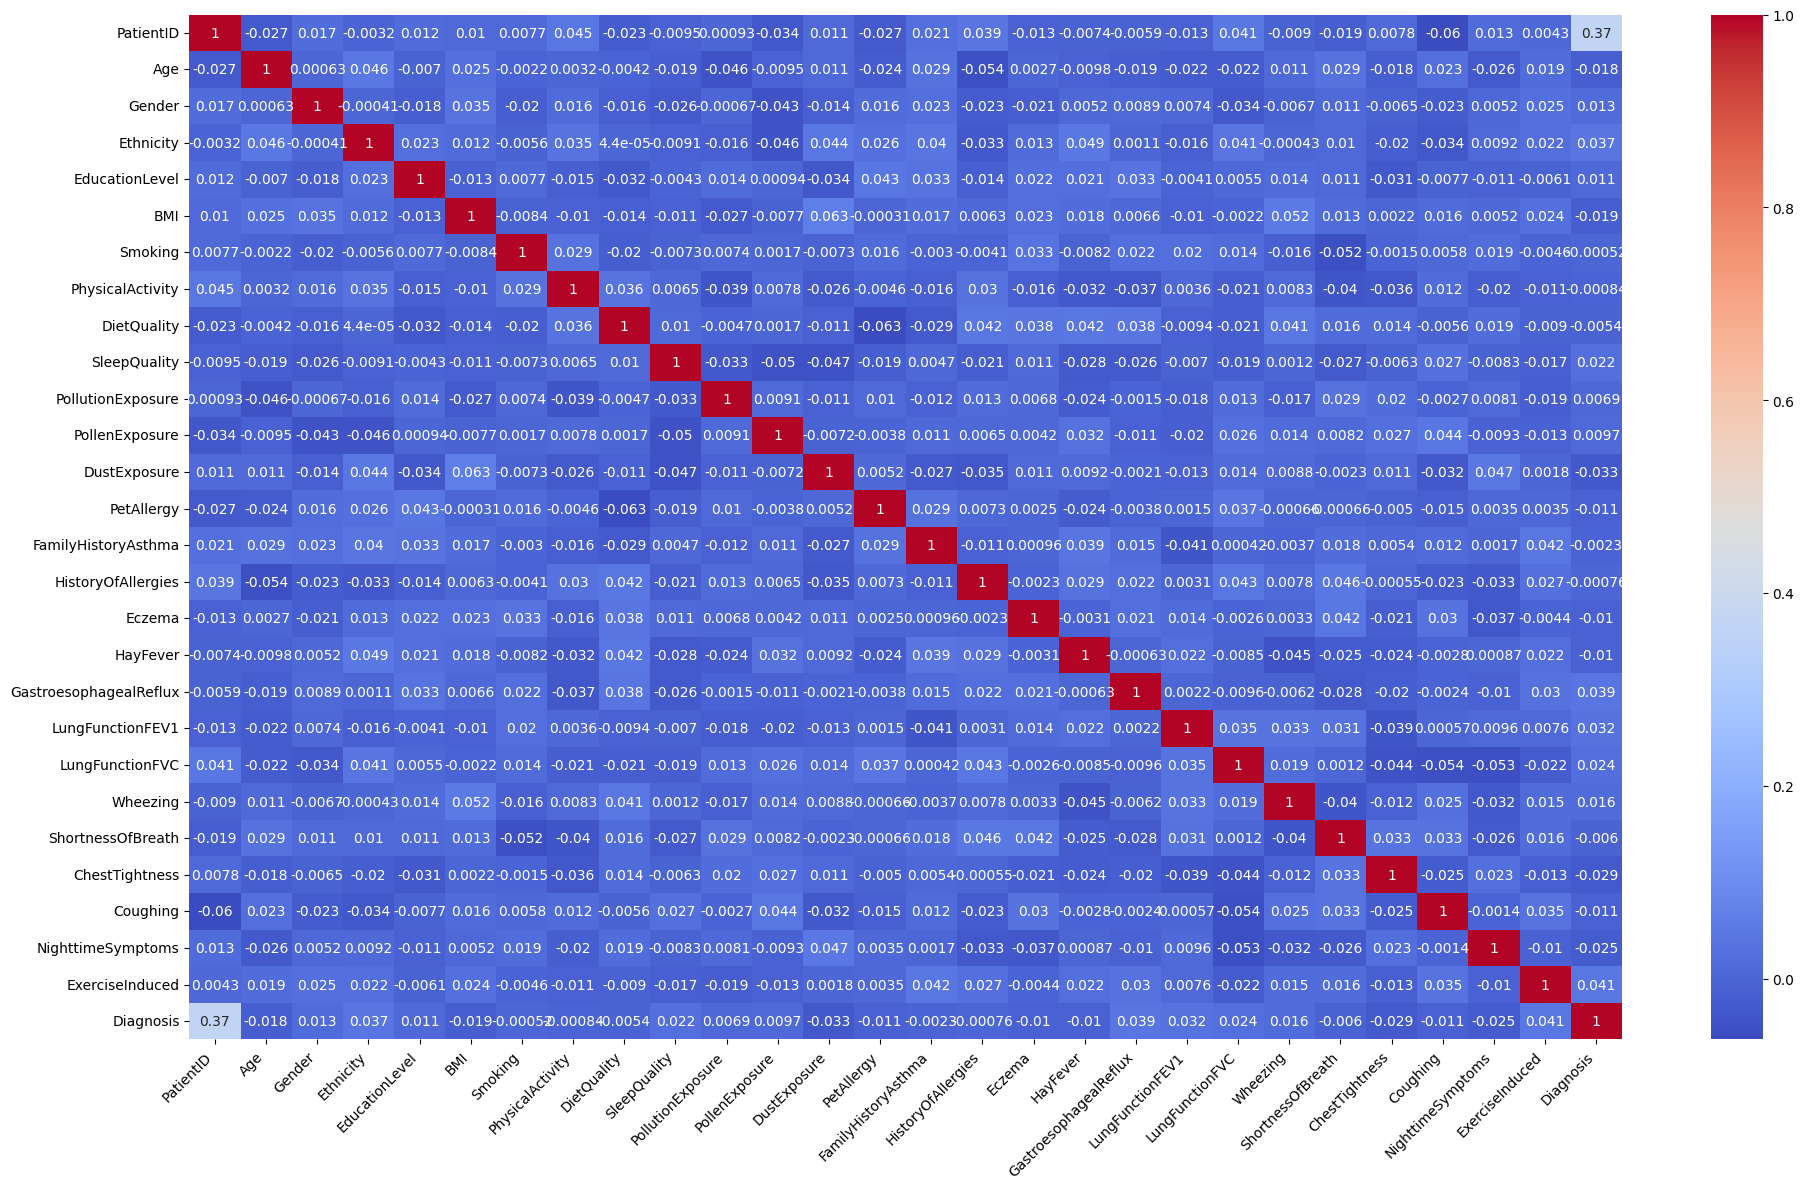

In [61]:
cm = df_train.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True,cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [62]:
# After research online, I found that FEV1/FVC Ratio suggests:
# Under 70%	-> Mild
# 60 to 69%	-> Moderate
# 50 to 59%	-> Moderately severe
# 35 to 49%	-> Severe
# Under 35%	-> Very severe

In [63]:
df_train['FEV1_FVC_Ratio'] = df_train['LungFunctionFEV1']/df_train['LungFunctionFVC']
df_test['FEV1_FVC_Ratio'] = df_test['LungFunctionFEV1']/df_test['LungFunctionFVC']

In [64]:
df_train['FEV1_FVC_Ratio'].describe()

count    1913.000000
mean        0.787603
std         0.430638
min         0.171552
25%         0.475260
50%         0.682290
75%         0.975742
max         2.577281
Name: FEV1_FVC_Ratio, dtype: float64

#### Removing unnesecessary cols based on personal/business knowledge and after looking at above query

In [65]:
df_train.drop(['PatientID','LungFunctionFEV1','LungFunctionFVC'],axis=1,inplace=True)
df_test.drop(['PatientID','LungFunctionFEV1','LungFunctionFVC'],axis=1,inplace=True)

#### Handling the outliers

In [66]:
df_train[df_train['FEV1_FVC_Ratio']>1].shape

(453, 26)

In [67]:
df_train = df_train[df_train['FEV1_FVC_Ratio']<=1]
df_test = df_test[df_test['FEV1_FVC_Ratio']<=1]

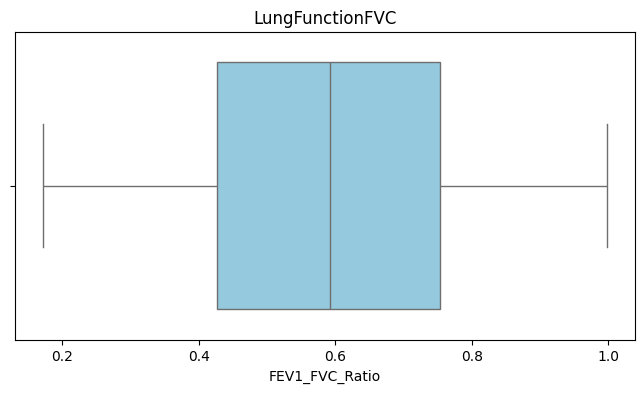

In [68]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_train["FEV1_FVC_Ratio"], color="skyblue", orient="h")
plt.title(column)
plt.show()

In [69]:
df_train['Diagnosis'].value_counts()


Diagnosis
0    1382
1      78
Name: count, dtype: int64

#### Handling class imbalance using smote

In [70]:
from imblearn.combine import SMOTETomek

X_train = df_train.drop(columns=['Diagnosis'])
y_train = df_train['Diagnosis']

X_test = df_test.drop(columns=['Diagnosis'])
y_test = df_test['Diagnosis']

smote_tomek = SMOTETomek(random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

In [71]:
y_train.value_counts()

Diagnosis
0    1381
1    1381
Name: count, dtype: int64

### Model Tuning

In [72]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, roc_auc_score, accuracy_score

In [73]:
pipeline = Pipeline([
    ("clf", LogisticRegression())
])

param_grid = [
    {
        "clf": [LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)],
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__solver": ["liblinear", "lbfgs"]
    },
    {
        "clf": [GaussianNB()],
        "clf__var_smoothing": [1e-9, 1e-8, 1e-7]
    },
    {
        "clf": [RandomForestClassifier(class_weight="balanced", random_state=42)],
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [None, 10, 20],
        "clf__min_samples_split": [2, 5]
    }
]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "recall_macro": "recall_macro",
    "roc_auc": "roc_auc"
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1_macro",  
    cv=kf,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Model:", grid.best_estimator_["clf"].__class__.__name__)
print("Best Parameters:", grid.best_params_)
print("Best Mean F1 (macro):", grid.best_score_)

y_pred = grid.predict(X_test)
print("\nTest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Model: RandomForestClassifier
Best Parameters: {'clf': RandomForestClassifier(class_weight='balanced', random_state=42), 'clf__max_depth': 20, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best Mean F1 (macro): 0.9616209273452627

Test Results:
Accuracy: 0.9052924791086351
